LOAD ALL FILES INTO INDIVIDUAL DATA FRAMES AND LOOK FOR COMMONALITIES

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import json
from pandas.io.json import json_normalize
import os.path

LOAD ALL FILES INTO INDIVIDUAL DATA FRAMES AND LOOK FOR COMMONALITIES

In [2]:
#os.path.join
clean_dir = '/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Clean_CSV'

In [3]:
us_yemen_path = os.path.join(clean_dir, 'US_Yemen_updated.csv')
cia_pakistan_path = os.path.join(clean_dir, 'CIA_Pakistan_updated.csv')
us_somalia_path = os.path.join(clean_dir, 'US_Somalia_updated.csv')
us_afghanistan_path = os.path.join(clean_dir, 'US_Afghanistan_Data.csv')

In [4]:
#CIA_Pakistan_clean_data
pakistan = pd.read_csv(cia_pakistan_path)
#US_Somalia_clean_data 
somalia = pd.read_csv(us_somalia_path)
#US_Yemen_clean_data 
yemen = _data = pd.read_csv(us_yemen_path)
#US_Afghanistan_clean_data 
afghanistan = pd.read_csv(us_afghanistan_path)

In [5]:
frames = [afghanistan, yemen, somalia, pakistan]
master_frame = pd.concat(frames)
for frame in frames:
    print(frame.shape)

(442, 26)
(299, 21)
(86, 20)
(430, 15)


In [6]:
#MasterFrame.columns
#MasterFrame.shape
master_frame.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 429
Data columns (total 30 columns):
Air strike?                                                   385 non-null float64
Area                                                          430 non-null object
Counter-
terrorism, force protection or strategic effects?    442 non-null object
Date                                                          1257 non-null object
Drone strike                                                  827 non-null float64
Index                                                         1257 non-null int64
Location                                                      1256 non-null object
Maximum children killed                                       1257 non-null int64
Maximum civilians killed                                      1257 non-null int64
Maximum number of strikes                                     299 non-null float64
Maximum people injured                                        1257 no

LOAD JSON FILE CREATED FROM CIA TWITTER FEED

In [7]:
#with keyword automatically closes file at the end
with open('/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Drone_Data.json') as f:
    twitter_drone = json.load(f)
twitter_drone.keys()
    
#JSON_DF_stats['status'] = pd.DataFrame(twitter_drone)
JSON_DF_stats = pd.DataFrame(twitter_drone['strike'])
# remove all the columns, that are not common
# combine all the data frames into one
# look at pandas documentation, combine things into one big data frame
# do same for both sets of data, get 2 clean dataframes, 

In [8]:
#twitter_drone_data_strike = pd.DataFrame(twitter_drone['strike'])
JSON_DF_stats.head(3)


,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
0,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,2002-11-03T00:00:00.000Z,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688
1,55c79e711cbee48856a30887,[],http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,2004-06-17T00:00:00.000Z,6-8,...,1,32.30512565,South Waziristan,69.57624435,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824
2,55c79e711cbee48856a30888,[],http://www.thebureauinvestigates.com/2011/08/1...,"Two killed, including Haitham al-Yemeni an al ...",B2,,,Pakistan,2005-05-08T00:00:00.000Z,2,...,,32.98677989,North Waziristan,70.26082993,"[Haitham al-Yemeni, Samiullah Khan]",2 people killed in a Predator strike which rep...,3,Haitham al-Yemeni,Toorikhel,278544812255367168


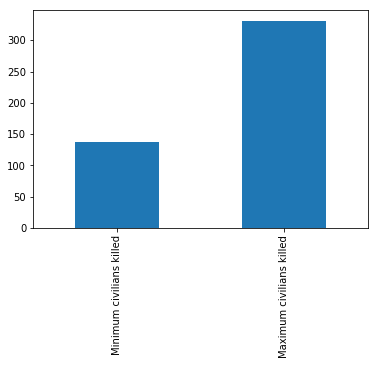

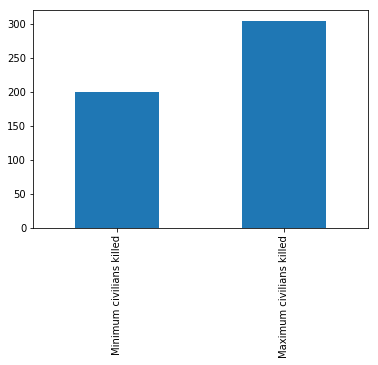

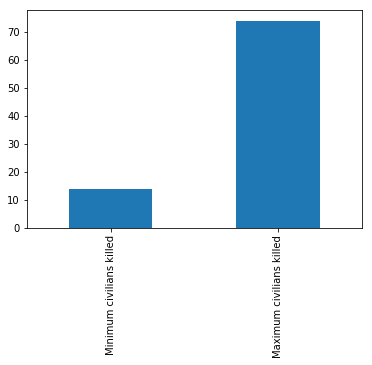

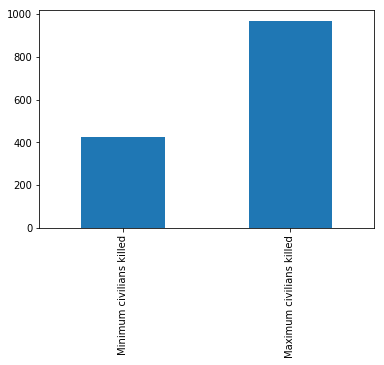

In [26]:
#Count something interesting
# of civilian deaths per AO
for frame in frames:
    cols = [('Minimum civilians killed'), ('Maximum civilians killed')]    
    frame[cols].sum().plot.bar()
    plt.show()



In [ ]:
for frame in frames:
    